## CAPM Regression of Returns to Find Alpha & Beta ##
 **The Capital Asset Pricing Model (CAPM):**
 
 $$
 \mathbb{E}[R_i] = r_f + \beta_i \big(\mathbb{E}[R_m] - r_f\big)
 $$
 
 - $\mathbb{E}[R_i]$ : Expected return of asset $i$
 - $r_f$ : Risk-free rate   
 - $\beta_i$ : Sensitivity (“beta”) of $i$ to market returns
 - $\mathbb{E}[R_m]$ : Expected market return
 - $\big(\mathbb{E}[R_m] - r_f\big)$ : Market risk premium
 
Goal of this project: Run a regression to see how much of the fund's returns are explained by the market

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [125]:
# Pull historical data from yfinance starting from the year 2000
df = yf.download("ACWI", start="2000-01-01", multi_level_index=False) #MSCI ACWI index
df['market_rets'] = df['Close'].pct_change()
df = df.dropna()
display(df.head())
display(df.tail())

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,market_rets
Date,,,,,,
2008-03-31,35.113640,35.597770,35.113640,35.597770,400,-0.015569
2008-04-01,36.060551,36.060551,35.711691,35.775767,600,0.026967
2008-04-02,36.459236,36.594509,36.345323,36.395160,10700,0.011056
2008-04-03,36.665710,42.503746,36.274135,42.503746,29100,0.005663
2008-04-04,36.644352,39.121957,36.644352,39.121957,9900,-0.000583


,Close,High,Low,Open,Volume,market_rets
Date,,,,,,
2026-02-04,144.990005,146.250000,144.169998,146.149994,6793500,-0.003779
2026-02-05,143.210007,144.539993,142.919998,143.809998,4062200,-0.012277
2026-02-06,146.279999,146.470001,144.419998,144.460007,4312200,0.021437
2026-02-09,147.410004,147.679993,146.039993,146.279999,3577700,0.007725
2026-02-10,147.309998,148.009995,147.240005,147.820007,6699600,-0.000678


In [ ]:
#Get returns data (depends on fund)
fund_data = pd.read_csv("C:/Users/admin/Desktop/Python Projects/seldon-capital-returns.csv")
fund_data = fund_data[['Date', 'Net Return']].dropna()

# Prepare fund returns
fund_data['Date'] = pd.to_datetime(fund_data['Date'])
fund_data = fund_data.set_index('Date').sort_index()
fund_data['Net Return'] = fund_data['Net Return'].str.rstrip('%').astype('float') / 100

fund_data.to_csv('output_fund_data.csv')

display(fund_data.head())
display(fund_data.tail())

C:\Users\admin\AppData\Local\Temp\ipykernel_26948\533892810.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fund_data['Date'] = pd.to_datetime(fund_data['Date'])


,Net Return
Date,
2021-04-30,-0.0229
2021-05-31,0.0174
2021-06-30,-0.0391
2021-07-31,0.0398
2021-08-31,-0.0019


,Net Return
Date,
2025-08-31,0.0174
2025-09-30,-0.0157
2025-10-31,0.0619
2025-11-30,0.0469
2025-12-31,0.0010


In [ ]:

#get fund returns and market returns
fund_rets = fund_data['Net Return']
market_rets = df['market_rets'].resample('M').apply(lambda x: (1 + x).prod() - 1) #Change this depending on the hedge fund returns data frequency

market_rets.to_csv('market_returns.csv')#sanity check

# Align series on common dates
rets, market_rets = fund_rets.align(market_rets, join='inner')
rets = rets.dropna()
market_rets = market_rets.dropna()

display(rets.head())
display(rets.tail())

print("Market Returns:")
display(market_rets.head())
display(market_rets.tail())

C:\Users\admin\AppData\Local\Temp\ipykernel_26948\3906484847.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  market_rets = df['market_rets'].resample('M').apply(lambda x: (1 + x).prod() - 1) #Change this depending on the hedge fund returns data frequency


Date
2021-04-30   -0.0229
2021-05-31    0.0174
2021-06-30   -0.0391
2021-07-31    0.0398
2021-08-31   -0.0019
Name: Net Return, dtype: float64

Date
2025-08-31    0.0174
2025-09-30   -0.0157
2025-10-31    0.0619
2025-11-30    0.0469
2025-12-31    0.0010
Name: Net Return, dtype: float64

Market Returns:


Date
2021-04-30    0.042459
2021-05-31    0.014719
2021-06-30    0.012609
2021-07-31    0.009092
2021-08-31    0.021741
Name: market_rets, dtype: float64

Date
2025-08-31    0.026777
2025-09-30    0.035971
2025-10-31    0.022931
2025-11-30    0.000424
2025-12-31    0.008929
Name: market_rets, dtype: float64

### Returns with risk-free rate ###

rf (monthly) = 0.338060%
beta = 0.0548, alpha (monthly) = 0.005558
mean alpha component = 0.005558
mean beta component  = 0.000329


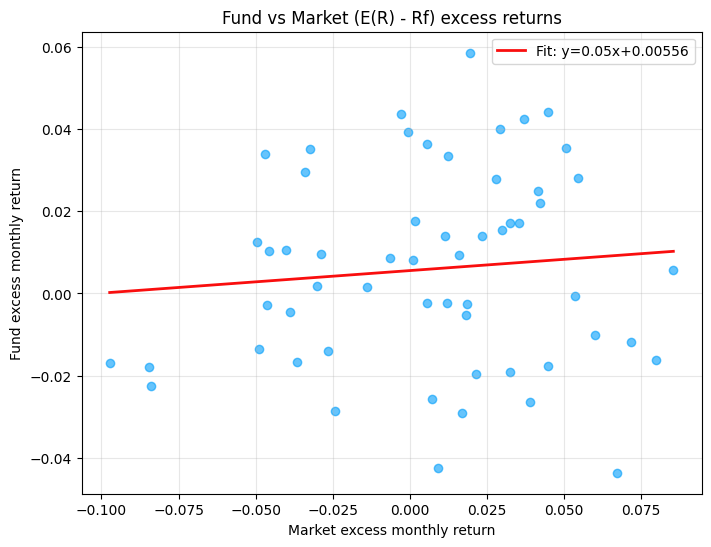

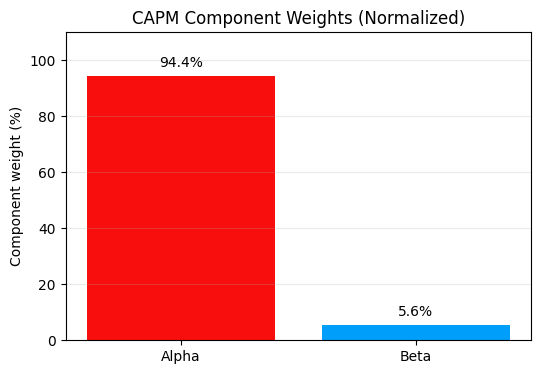

In [128]:
# CAPM (excess returns) alpha/beta components
# Uses existing variables: rets (fund monthly returns) and market_rets (benchmark monthly returns)

alpha_color = "#f90e0eff"
beta_color = '#009efb'

#Get 10-year treasury bill data
ten_year_yield = 0.04133

# Single annual risk-free yield (e.g., 10Y). Set this to your value.
rf_yield_annual = ten_year_yield

# Convert annual yield to a constant monthly return (compounded convention)
rf = (1.0 + rf_yield_annual) ** (1.0 / 12.0) - 1.0

market_excess = market_rets - rf
fund_excess = rets - rf

# CAPM regression on excess returns: fund_excess = alpha + beta * market_excess
beta, alpha = np.polyfit(market_excess, fund_excess, 1)

# Mean components (no residual/noise term)
alpha_component = float(alpha)
beta_component = float(beta) * float(market_excess.mean())

print(f'rf (monthly) = {rf * 100 :.6f}%')
print(f'beta = {beta:.4f}, alpha (monthly) = {alpha:.6f}')
print(f'mean alpha component = {alpha_component:.6f}')
print(f'mean beta component  = {beta_component:.6f}')

# Normalize components (0-100%)
components = [alpha_component, beta_component]
components_nonneg = [max(0.0, float(x)) for x in components]
components_sum = float(sum(components_nonneg))
if components_sum > 0:
    components_pct = [x / components_sum * 100.0 for x in components_nonneg]
else:
    components_pct = [0.0, 0.0]


# Scatter plot to display the fund's return corelation with market
x = market_excess.dropna()
y = fund_excess.reindex(x.index).dropna()
x = x.reindex(y.index)

# Fitted line: y = alpha + beta * x
x_sorted = x.sort_values()
y_fit = alpha + beta * x_sorted

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, color=beta_color)
plt.plot(
    x_sorted,
    y_fit,
    color=alpha_color,
    linewidth=2,
    label=f"Fit: y={beta:.2f}x+{alpha:.5f}",
)
plt.xlabel("Market excess monthly return")
plt.ylabel("Fund excess monthly return")
plt.title("Fund vs Market (E(R) - Rf) excess returns")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


# Plot normalized alpha and beta (0-100%)

labels = ['Alpha', 'Beta']
colors = [alpha_color, beta_color]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, components_pct, color=colors)
plt.ylabel("Component weight (%)")
plt.title("CAPM Component Weights (Normalized)")
plt.ylim(0, 110)
plt.grid(axis="y", alpha=0.25)
for b in bars:
    h = b.get_height()
    plt.text(
        b.get_x() + b.get_width() / 2,
        h + 2,
        f"{h:.1f}%",
        ha="center",
        va="bottom",
    )
plt.show()

